In [1]:
import json
import pickle
from PIL import Image, ImageDraw
import numpy as np

from IPython.display import display 

In [2]:
# 'discovered_h36m'
updated = {'data': [],
           'dataset': 'discovered_h36m_train'}

In [3]:
pred = pickle.load(open("h36m_preds.pkl", "rb"))
im_paths = pickle.load(open("h36m_im_paths.pkl", "rb"))
vis = pickle.load(open("h36m_vis.pkl", "rb"))

In [4]:
data_names = ['kp_loc', 'kp_vis', 'image_path', 'h36m_info', 'kp_loc_3d']

In [5]:
print(vis[0][0])

[0.42081478 0.48773864 0.42136657 0.27944016 0.1849851  0.40743533
 0.5860266  0.34393635 0.23373015 0.4730005 ]


In [6]:
print(pred[0][0])

[[-0.12173527  0.16374575]
 [-0.21711129 -0.49347267]
 [-0.12040345 -0.6383643 ]
 [-0.22654474  0.15386622]
 [-0.24581635 -0.31841528]
 [-0.2587158  -0.23176575]
 [ 0.26998702 -0.34488684]
 [-0.05036833 -0.4997555 ]
 [-0.09671645 -0.44000283]
 [-0.14087991 -0.23114443]]


In [7]:
print(im_paths[0][0])

/home/ubuntu/experiments/efs/Human36m/h36m-fetch/processed/S1/Discussion-2/imageSequence/60457274/img_000904.jpg


In [8]:
print(list((vis[0][0] > 0.1).astype('int8')))

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [10]:
im_id = 0; sample_id=1

im = im_paths[im_id][sample_id]
tmp = Image.open(im)
draw = ImageDraw.Draw(tmp)

pts = pred[im_id][sample_id]
pts = (pts + 1) / 2.0 * 1000

In [21]:
colors = ['blue', 'red', 'green', 'yellow', 'cyan', 'violet', 'gold',
         'black', 'darkgray', 'ivory', 'indigo', 'orange', 'purple', 'black']
for p_i in range(10):
    draw.ellipse((int(pts[p_i][0]-5), int(pts[p_i][1]-5), int(pts[p_i][0]+5), int(pts[p_i][1]+5)),
                 fill = colors[p_i], outline ='blue')

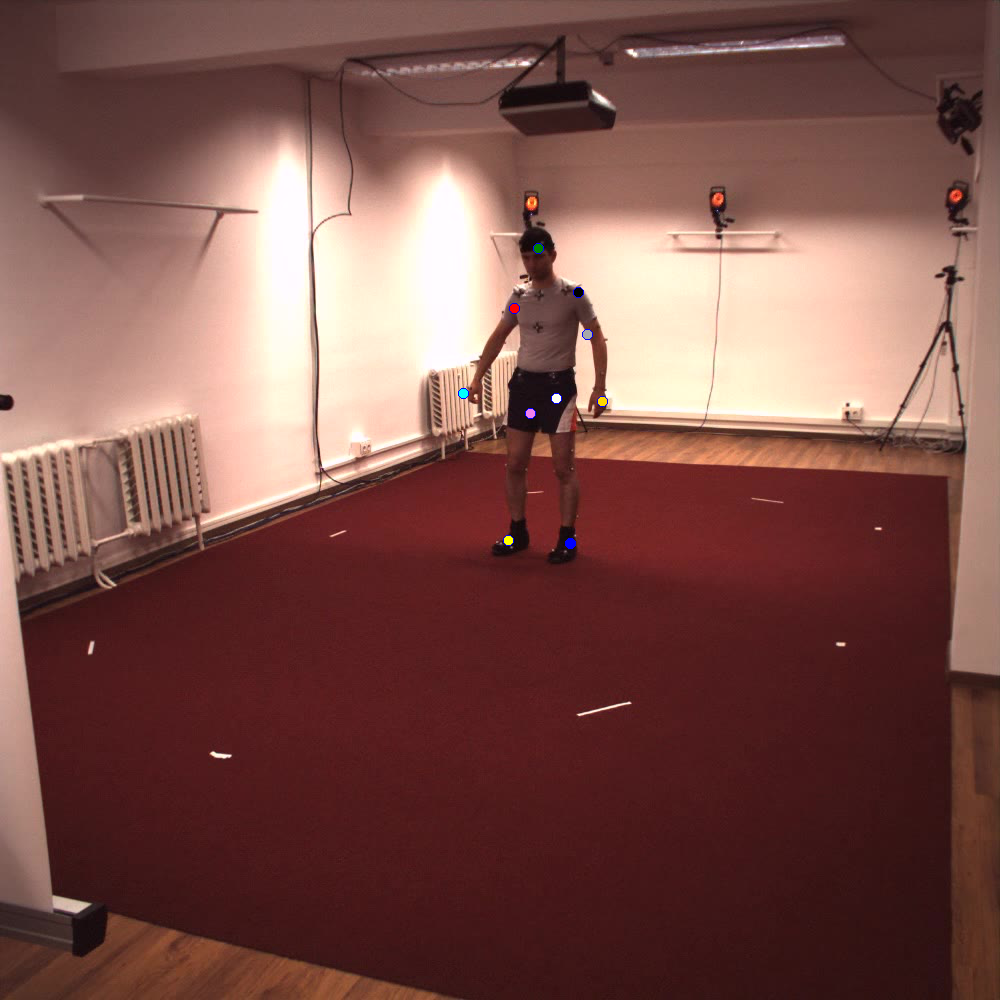

In [22]:
display(tmp)

In [8]:
# valid_ids = [1,2,3,5,6,7,8,9,10,11,12,13]
valid_ids = [0,1,2,3,4,5,6,7,8,9]
connectivity = [[1,7], [1, 4], [7,8], [8,6], [9,0], [1,5], [5,3], [7,9]]

In [9]:
# list, [[xs],[ys]]
for i in range(len(pred)):
    for j in range(len(pred[i])):
        kp_loc = [list(pred[i][j][valid_ids,0]), list(pred[i][j][valid_ids,1])]
        kp_vis = list((vis[i][j][valid_ids] > 0.1).astype('int8'))
        image_path = im_paths[i][j]
        dic = {'kp_loc': kp_loc,
               'kp_vis': kp_vis,
               'image_path': image_path}
        updated['data'].append(dic)
        

In [10]:
print(updated['data'][0])

{'kp_loc': [[-0.12173527, -0.21711129, -0.12040345, -0.22654474, -0.24581635, -0.2587158, 0.26998702, -0.050368328, -0.09671645, -0.14087991], [0.16374575, -0.49347267, -0.6383643, 0.15386622, -0.31841528, -0.23176575, -0.34488684, -0.4997555, -0.44000283, -0.23114443]], 'kp_vis': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'image_path': '/home/ubuntu/experiments/efs/Human36m/h36m-fetch/processed/S1/Discussion-2/imageSequence/60457274/img_000904.jpg'}


In [11]:
ids = np.random.permutation(range(len(updated['data'])))
train = {'data': [updated['data'][ii] for ii in ids[10000:]],
         'dataset': 'discovered_h36m_train'}

In [12]:
valid = {'data': [updated['data'][ii] for ii in ids[:10000]],
         'dataset': 'discovered_h36m_val'}

In [13]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [14]:
with open("discovered_h36m_train.json", "w") as outfile:
    json.dump(train, outfile, cls=MyEncoder)
    
with open("discovered_h36m_val.json", "w") as outfile:
    json.dump(valid, outfile, cls=MyEncoder)

In [41]:
check = json.load(open("discovered_h36m_val.json", "r"))

In [43]:
print(check.keys())

dict_keys(['data', 'dataset'])


In [44]:
print(len(train['data']))

116299


In [30]:
print(train['data'][0])

{'kp_loc': [[-0.12073733, -0.2537301, -0.23111033, -0.26363528, -0.3251166, -0.25367257, -0.15028374, -0.15892863, -0.18041255, -0.20293151], [0.06993438, -0.36050266, -0.4631416, 0.11581539, -0.14605565, -0.1350823, -0.2916281, -0.37265113, -0.30195093, -0.14465964]], 'kp_vis': [1, 1, 1, 1, 1, 0, 1, 1, 1, 1], 'image_path': '/home/ubuntu/experiments/efs/Human36m/h36m-fetch/processed/S7/Walking-2/imageSequence/55011271/img_002419.jpg'}
